# Flow control

We now briefly look at the flow control statements for selection (**if ... then ... else**) and iteration (**for** and **while**).

### Selection
The syntax of **if ... then** is the following
```
if <condition 1>:
    <code block 1>
elif <condition 2>:
    <code block 2>
else:
    <code block 3>
```
In Python, a code block must be preceded by `:` and indented by the same amount of spaces or tabs.

In the selection statement, the interpreter executes only one code block according to the following rule:
- `code block 1` if `condition 1` is true
- otherwise `code block 2` if `condition 2` is true
- otherwise `code block 3`

Note that:
- There can be zero or more than one `elif` clauses. If there is more than one, the code block that gets executed is the first one whose associated condition is true.
- If the `else` clause is missing, then no code block might get executed. 

In [1]:
x = 'pluto'
if x == 'pippo':
    print('Pippo')
else:
    print('Not Pippo')

Not Pippo


In [2]:
x = 65
if x >= 90:
    print('A')
elif x >= 75:
    print('B')
elif x >=60:
    print('C')
else:
    print('F')

C


### Ternary expressions
A *ternary expression* allows to combine in a single expression an *if-else* block that produces a single value.
```
if <condition>:
    value = <expression 1>
else:
    value = <expression 2>
```
can be equivalently written as
```
value = <expression 1> if <condition> else <expression 2>
```
Here is a simple example

In [3]:
x = 5
s = 'nonnegative' if x >= 0 else 'negative'
s

'nonnegative'

### For loops
The syntax of the **for** statement is the following:
```
for <variable> in <sequence>:
    <code block>
```
`sequence` can be a list, a tuple, or any *iterable* collection. The interpreter iterates over the elements of the sequence. At each iteration, the code block is executed with `variable` assigned to the current element of the sequence.

Here is an example using the built-in constant `None` which in Python represents the absence of a value.

In [4]:
x = [1, 2, None, 4, None, 5]
count = 0
for v in x:
    if v != None:
        count += v
print(count)

12


### While loops
The **while** statement has the following syntax:
```
while <condition>:
    <code block>
```
The interpreter cycles over the two following operations:
1. Check `condition`
2. If `condition` is true, then execute the code block

Typically, `condition` contains variables, and the instructions in the code block modify these variables. 

## Ranges
The `range` type represents an **immutable sequence of numbers** and is commonly used for looping a specific number of times in for loops.

In [5]:
r = range(10)
type(r)

range

In [6]:
list(r)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

If we specify `start` and `stop` values, then the range object contains all integers from `start` to `stop-1`.

In [7]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

If we specify a `step` values, then the range contains integers of the form `r[i] = start + step*i` and satisfying the condition `r[i] < stop`.

In [8]:
list(range(0, 10, 3))

[0, 3, 6, 9]

`range(0)` and `range(1,0)` both correspond to the empty list `[]`.

In [9]:
list(range(0))

[]

In [10]:
list(range(1,0))

[]

# List comprehensions

Comprehensions provide a compact way to **filter elements from a sequence**. In case of lists, they allow to write the following for loop
```
result = []
for <variable> in <sequence>:
    if <condition>:
        result.append(<expression>)
```
in the following equivalent form
```
[<expression> for <variable> in <sequence> if <condition>]
```
Here is a simple example.

In [11]:
strings = ['foo', 'bar', 'baz', 'f', 'fo', 'b', 'ba']
[x.upper() for x in strings if x[0] == 'b']

['BAR', 'BAZ', 'B', 'BA']

The expression part in a list comprehension can be complex. In the following example, the expression builds a tuple of two elements.

In [12]:
[(x, x**2) for x in range(6)]

[(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

List comprehensions can be nested. Here is an example where we extract the integers from a list of tuples of integers (an operation called *flattening*).

In [13]:
x = [(1, 2, 3), (4, 5, 6)]
[v for t in x for v in t]

[1, 2, 3, 4, 5, 6]

In [14]:
x = [(1, 2, 3), (4, 5, 6)]
result = []
for t in x:
    for v in t:
        result.append(v)
result

[1, 2, 3, 4, 5, 6]

Here is another example where we square even numbers and set to 1 odd numbers.

Note that the expression part is a ternary expression.

In [15]:
x = [0, 1, 2, 3, 4]
even_squares_or_one = [v ** 2 if v % 2 == 0 else 1 for v in x]
even_squares_or_one

[0, 1, 4, 1, 16]

# Importing a module

A module in python is a file with a `.py` extension containing code defining functions, constants, and types that are not available as built-in entities. The `import` statement is used to load a module. The imported functions, constants, and types are available **prefixed with the module name**.

In [16]:
import math
math.pi

3.141592653589793

Instead of importing an entire module, we can import one or more functions, constants, or types.

In [17]:
ages = [24, 17, 72, 36, 56, 20]
from statistics import mean
mean(ages)

37.5

By using the keyword `as` we can change the name of the imported element or module.

In [18]:
from statistics import median as med
med(ages)

30.0

In [19]:
import statistics as stat
stat.stdev(ages)

22.106560112328648

We now see list comprehensions in action on data uploaded from a file. Before that, let's introduce the `with` statement for opening files. Its syntax is
```
with open(<filename>) as <variable>:
    <code block>
```
`<variable>` is the *handle* for the file. We can treat it as a list and iterate over the file lines.


The file is `Datasets/diabetes.csv`. We can take a look at it using the Unix shell command `cat` to print a file o screen. Shell commands can be invoked from Jupyter using `!`. So the complete command is `!cat Datasets/diabetes.csv`

This is the *Pima Indian Diabetes Database*. The dataset was prepared with the purpose of training machine learning algorithms to predict whether or not a patient has diabetes based on a set of diagnostic measurements: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.

We open the file for reading and assign the handle to `pima_file`. Then, we use a list comprehension to build a list whose elements are the lines in the file.

In [41]:
with open('Datasets/diabetes.csv') as pima_file:
    lines = [x for x in pima_file]
lines[:10]

['Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\n',
 '6,148,72,35,0,33.6,0.627,50,1\n',
 '1,85,66,29,0,26.6,0.351,31,0\n',
 '8,183,64,0,0,23.3,0.672,32,1\n',
 '1,89,66,23,94,28.1,0.167,21,0\n',
 '0,137,40,35,168,43.1,2.288,33,1\n',
 '5,116,74,0,0,25.6,0.201,30,0\n',
 '3,78,50,32,88,31,0.248,26,1\n',
 '10,115,0,0,0,35.3,0.134,29,0\n',
 '2,197,70,45,543,30.5,0.158,53,1\n']

Note that each line is terminated by a newline `\n` character.

We can process csv files more efficiently using the csv module. This module provides the function `reader()` which returns an object of type `reader` containing all the lines in the file, without the newline character, and broken in substrings using a specified delimiter character (comma in our case). The reader object can then be converted into a list of lists using the type constructor `list()`.

In [22]:
import csv
with open('Datasets/diabetes.csv') as pima_file:
    pima_reader = csv.reader(pima_file, delimiter=',')
    lines = list(pima_reader)[1:]

Note that we used slicing to get rid of the first line of the file.

In [42]:
lines[:10]

['Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\n',
 '6,148,72,35,0,33.6,0.627,50,1\n',
 '1,85,66,29,0,26.6,0.351,31,0\n',
 '8,183,64,0,0,23.3,0.672,32,1\n',
 '1,89,66,23,94,28.1,0.167,21,0\n',
 '0,137,40,35,168,43.1,2.288,33,1\n',
 '5,116,74,0,0,25.6,0.201,30,0\n',
 '3,78,50,32,88,31,0.248,26,1\n',
 '10,115,0,0,0,35.3,0.134,29,0\n',
 '2,197,70,45,543,30.5,0.158,53,1\n']

We can use another list comprehension to extract the element in position 7 in each line (the age column) and then apply the type constructor `float()` to turn it into a float.

In [44]:
ages = [float(v[7]) for v in lines]
ages

ValueError: could not convert string to float: 'c'

We want to plot a histogram of these ages. We first create the histogram bins using the `range()` type constructor.

In [25]:
age_bins = list(range(20, 80, 5))
age_bins

[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]

In order to plot the histogram, we load the interface `pyplot` of the module `matplotlib` and assign it the conventional name `plt`. Then we construct the histogram with the function `hist()` and print it with the function `show()`.

The *magic command* `%matplotlib notebook` provides nice display capabilities for matplotlib in Jupyter notebooks

Magic commands are executed by the kernel and allow to perform various tasks.

<IPython.core.display.Javascript object>


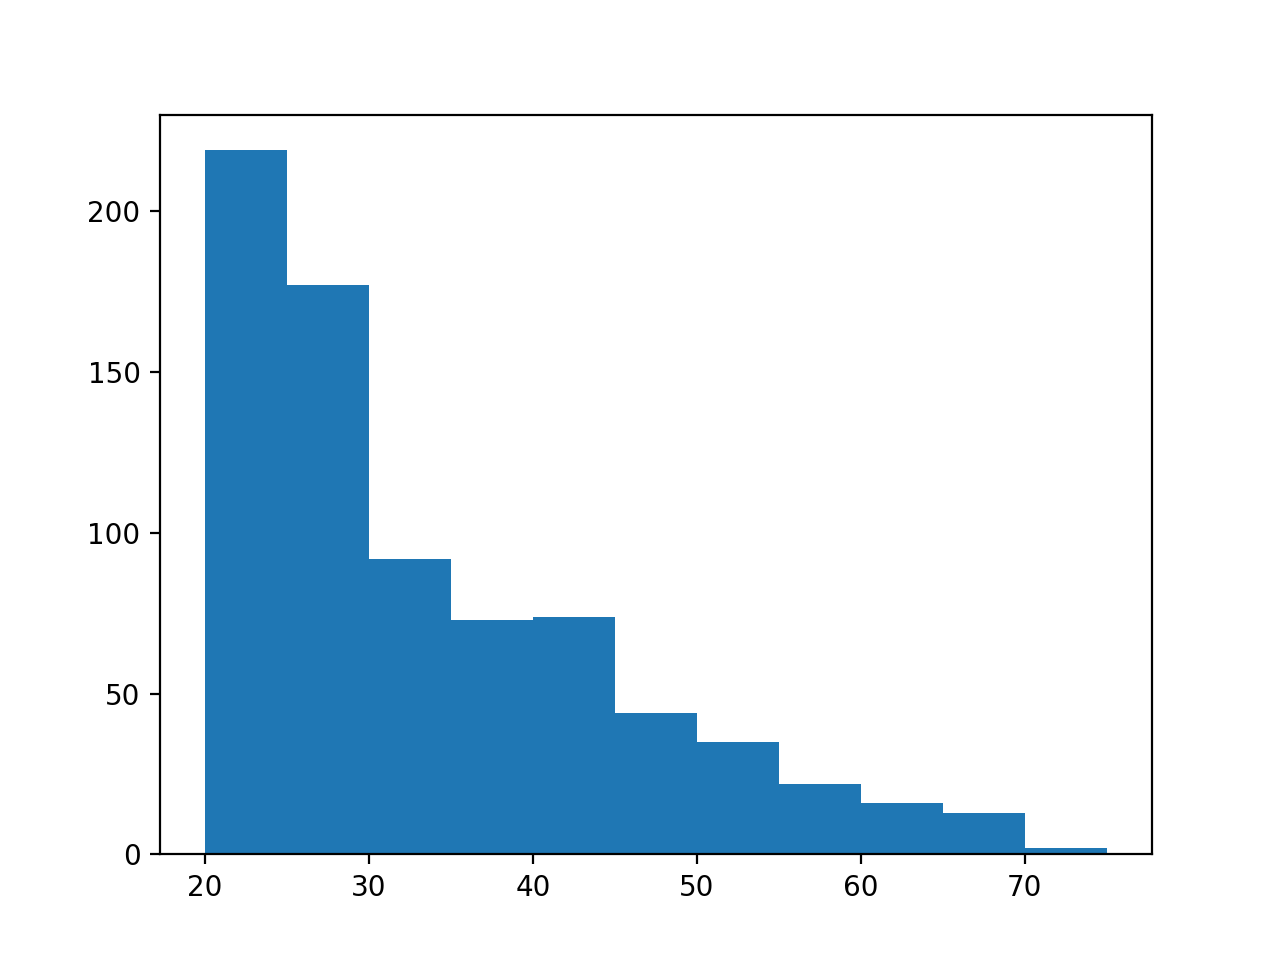

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.hist(ages, bins=age_bins)
plt.show()

Note that we invoked the method `hist()` with arguments `ages` and `bins=age_bins`. In Python, function arguments can be *positional* like `ages` or *keyword* like `bins`.

Positional arguments are order-dependent and must precede keyword arguments. Keyword arguments, instead, are order-independent.

## Dictionaries

The built-in type `dict` implements a hash map as a mutable collection of key-value pairs. Dicts can be created using the syntax
```
{key_1 : value_1, ..., key_n : value_n}
```

In [27]:
d = {7 : 'pippo', 'b' : [1, 2, 3]}
type(d)

dict

While the values can be any object, keys are restricted to be scalar (int, float, string) or tuples containing immutable objects. We can check whether an object can be used as a key using the `hash()` built-in function, which returns a hash code of its argument.

In [28]:
hash(((1, 2, 3), 'pippo'))

-8025001159064154990

We can access elements of a dict via the indexing operator `[]`.

In [29]:
d['b']

[1, 2, 3]

Adding elements to a dictionary is easy.

In [30]:
d[(1,2)] = 3
d

{7: 'pippo', 'b': [1, 2, 3], (1, 2): 3}

We can search for a key using the `in` operator, and delete and entry using the `del()` keyword or the `pop()` method.

In [31]:
'b' in d

True

In [32]:
del d['b']
d

{7: 'pippo', (1, 2): 3}

In [33]:
d.pop(7)

'pippo'

Similarly to the method `extend()` for lists, the method `update()` merges two dictionaries.

In [34]:
d = {} # empty dictionary
d2 = {0: 'a', 1 : 'b', 2 : 'c'}
d.update(d2)
d

{0: 'a', 1: 'b', 2: 'c'}

We can extract the keys and the values in a dictionary using the methods `keys()` and `values()`. Since these methods return specific objects, we can use the type constructor `list()` to make them into lists.

In [35]:
list(d.keys())

[0, 1, 2]

In [36]:
list(d.values())

['a', 'b', 'c']

Similarly, the method `items()` can be used to obtain a list of pairs `(key, value)`.

In [37]:
list(d.items())

[(0, 'a'), (1, 'b'), (2, 'c')]

In order to create a dictionary, we can use the type constructor `dict()` applied to a zip object.

In [38]:
a = [0, 1, 2]
b = ['pippo', 'pluto', 'paperino']
d = dict(zip(a,b))
d

{0: 'pippo', 1: 'pluto', 2: 'paperino'}

Alternatively, we can use a **dict comprehension**

In [39]:
nums = range(0,10)
d = {x : x**2 for x in nums if x % 2 == 0}
d

{0: 0, 2: 4, 4: 16, 6: 36, 8: 64}

Iterating over a dictionary is easy.

In [40]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for (animal, legs) in d.items():
    print(animal + ' = ' + str(legs)) # use the type constructor str() to convert an int into a string

person = 2
cat = 4
spider = 8
